# Pendulum Example

In this example we go from generating raw simulation data through extracting the generators of the underlying potential using SymDet.

In [1]:
import symdet
from symdet.utils.data_clustering import range_binning
import hephaestus as hp
import numpy as np
import tensorflow as tf
import copy
import matplotlib.pyplot as plt

### Generating the Data

First things first, we need to generate some data to use in the symmetry extraction. We have a pendulum swinging ideally with an angle for 4.0 degrees.

In [2]:
pendulum = hp.SinglePendulum(time_step=0.001, steps=50000, mass=1.0, gravity=10.0, theta_start=5.0)
integrator = hp.VelocityVerlet(time_step=0.001, model=pendulum)
pendulum.integrator = integrator  # update the integrator

In [3]:
pendulum.run_simulation()  # seperated to avoid unnecesary running of simulations.

Before rushing into clustering and generator studies we should spend some time looking at the data that has been generated.

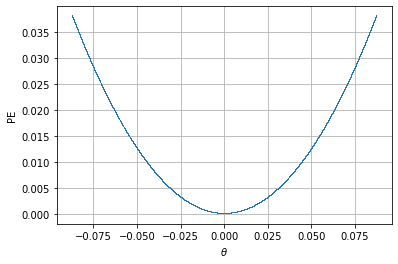

In [4]:
plt.plot(pendulum.theta, pendulum.pe, ',')
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('PE')
plt.show()

### Clustering the Data

In [5]:
x_data = pendulum.length * np.sin(pendulum.theta)
y_data = pendulum.length * np.cos(pendulum.theta)
domain = tf.convert_to_tensor(list(zip(x_data, y_data)))
image = tf.convert_to_tensor(pendulum.pe / max(pendulum.pe))

In [6]:
clustered_data = range_binning(image=image,
              domain=domain,
              value_range=[0, 3],
              bin_operation=[1 / 5, 0.008],
              representatives=500)

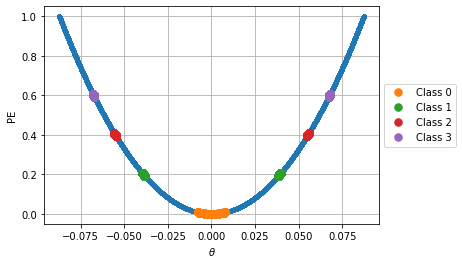

In [7]:
plt.plot(pendulum.theta, pendulum.pe / max(pendulum.pe), '.')
plt.grid()
plt.xlabel(r'$\theta$')
plt.ylabel('PE')

for i, item in enumerate(clustered_data):
    theta = np.arcsin(clustered_data[item]['domain'][:, 0]) / pendulum.length
    v = clustered_data[item]['image']
    plt.plot(theta, v, '.', label=f"Class {i}", markersize=15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Detecting Symmetry Groups

In [8]:
model = symdet.DenseModel(n_layers=7,
                          units=80,
                          epochs=10,
                          batch_size=64,
                          lr=0.00025)

In [9]:
sym_detector = symdet.GroupDetection(model, clustered_data)
point_cloud = sym_detector.run_symmetry_detection(plot=True)

0
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

InvalidArgumentError: cannot compute ConcatV2 as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:ConcatV2] name: concat